In [3]:
import pandas as pd
import numpy as np
import psycopg2 as pg 


In [18]:
conn = pg.connect(
    host="localhost",
    database="eeg",
    user="admin",
    password="admin123",
    port=5432
)

cur = conn.cursor()

# Import date 

In [19]:
data = pd.read_csv(r'D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\participants.tsv', sep='\t')
dataArray = data.to_numpy()

In [20]:
def checkSleep(sleep):
    if sleep == 'NS->SD':
        return 'good sleep'
    else:
        return 'bad sleep'

# insert participant's into database

In [22]:

try:
    for i in range(len(dataArray)):
        cur.execute("""INSERT INTO participant (participant_id,gender,age,session_order,sleep_status) VALUES (%s, %s, %s, %s,%s)""", (dataArray[i][0], dataArray[i][1], dataArray[i][2], dataArray[i][3], checkSleep(dataArray[i][3])))
    conn.commit()
except Exception as e:
    print(f"An error occurred: {e}")
    conn.rollback()


# definde Function insert Details

In [9]:
def insert_details(id, participant_id):
    cur = conn.cursor()

    for i in range(len(datadetailsArray)):
        channelName = datadetailsArray[i][0].lower()
        x = datadetailsArray[i][1]
        y = datadetailsArray[i][2]
        z = datadetailsArray[i][3]
        manufacturer = datadetailsArray[i][4]
        sqlinsert = f"INSERT INTO eegdetails (id,participant_id, x_{channelName}, y_{channelName}, z_{channelName}) VALUES ('{id}', '{participant_id}', {x}, {y}, {z})"
        sqlupdate = f"UPDATE eegdetails SET x_{channelName} = {x}, y_{channelName} = {y}, z_{channelName}  = {z} WHERE participant_id = '{participant_id}' and id = '{id}'"
        sqlmanufacturer = f"UPDATE eegdetails SET manufacturer = '{manufacturer}'  WHERE participant_id = '{participant_id}' and id = '{id}'"
        if i == 0:
            cur.execute(sqlinsert)
            conn.commit()
        elif i == len(datadetailsArray)-1:
            cur.execute(sqlmanufacturer)
            cur.execute(sqlupdate)
            conn.commit()
        else:
            cur.execute(sqlupdate)
            conn.commit()

    cur.close()

In [24]:
dataParticipant = pd.read_sql_query("SELECT id,participant_id FROM participant", conn)


dataParticipantArray = dataParticipant.to_numpy()

for i in range(len(dataParticipantArray)):
    participant_id = dataParticipantArray[i][1]
    filepath = rf"D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\{participant_id}\ses-1\eeg\{participant_id}_ses-1_electrodes.tsv"
    datadetails = pd.read_csv(filepath, sep='\t')
    datadetailsArray = datadetails.to_numpy()
    insert_details(dataParticipantArray[i][0], participant_id)


C:\Users\koonf\AppData\Local\Temp\ipykernel_30864\2559608763.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dataParticipant = pd.read_sql_query("SELECT id,participant_id FROM participant", conn)


## merger two df participant and details

In [ ]:
eeg_from_db = pd.read_sql_query("SELECT * FROM eegdetails", conn)
mergerdf = pd.merge(data, eeg_from_db, on='participant_id')

C:\Users\koonf\AppData\Local\Temp\ipykernel_30864\941495304.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  eeg_from_db = pd.read_sql_query("SELECT * FROM eegdetails", conn)


,participant_id,Gender,Age,SessionOrder,EEG_SamplingTime_Open_NS,EEG_SamplingTime_Closed_NS,EEG_SamplingTime_Open_SD,EEG_SamplingTime_Closed_SD,PVT_SamplingTime_NS,PVT_SamplingTime_SD,...,y_po4,z_po4,x_po8,y_po8,z_po8,x_o2,y_o2,z_o2,manufacturer,sleep_status
0,sub-01,M,22,NS->SD,8:57:52,9:04:40,8:18:28,8:25:34,9:27:23,9:23:08,...,-31.4828,20.8468,-68.7209,-49.6689,-5.953,-80.784,-26.133,-4.0011,Brain Products GmbH,good sleep
1,sub-02,M,21,NS->SD,9:47:46,9:53:24,8:54:10,8:59:50,10:16:59,10:00:47,...,-31.4828,20.8468,-68.7209,-49.6689,-5.953,-80.784,-26.133,-4.0011,Brain Products GmbH,good sleep
2,sub-03,F,19,NS->SD,8:49:46,8:55:38,9:58:36,10:04:08,8:45:04,9:34:13,...,-31.4828,20.8468,-68.7209,-49.6689,-5.953,-80.784,-26.133,-4.0011,Brain Products GmbH,good sleep
3,sub-04,M,22,NS->SD,9:53:56,9:59:34,9:07:02,9:12:26,10:05:35,10:06:28,...,-31.4828,20.8468,-68.7209,-49.6689,-5.953,-80.784,-26.133,-4.0011,Brain Products GmbH,good sleep
4,sub-05,F,18,NS->SD,20:37:12,20:47:34,9:09:00,9:14:34,21:01:57,10:07:33,...,-31.4828,20.8468,-68.7209,-49.6689,-5.953,-80.784,-26.133,-4.0011,Brain Products GmbH,good sleep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,sub-67,F,21,SD->NS,14:55:42,NaN,13:23:23,NaN,NaN,NaN,...,-31.4828,20.8468,-68.7209,-49.6689,-5.953,-80.784,-26.133,-4.0011,Brain Products GmbH,bad sleep
67,sub-68,F,21,SD->NS,17:04:59,NaN,15:02:13,NaN,NaN,NaN,...,-31.4828,20.8468,-68.7209,-49.6689,-5.953,-80.784,-26.133,-4.0011,Brain Products GmbH,bad sleep
68,sub-69,F,18,NS->SD,17:12:49,NaN,14:18:55,NaN,NaN,NaN,...,-31.4828,20.8468,-68.7209,-49.6689,-5.953,-80.784,-26.133,-4.0011,Brain Products GmbH,good sleep
69,sub-70,M,19,NS->SD,10:38:22,NaN,9:47:22,NaN,NaN,NaN,...,-31.4828,20.8468,-68.7209,-49.6689,-5.953,-80.784,-26.133,-4.0011,Brain Products GmbH,good sleep


# create colum for sleep status

In [ ]:
mergerdf['sleep_status'] = np.where(mergerdf['SessionOrder'] == 'NS->SD', 'good sleep', 'bad sleep')

### export to csv

In [34]:
mergerdf.to_csv(r'D:\Work\DSDE\Notebook\mergerdf.csv', index=False)

# Train model session

In [4]:
eeg_state = pd.read_csv(r'D:\Work\DSDE\Notebook\mergerdf.csv')

eeg_state

,participant_id,Gender,Age,SessionOrder,EEG_SamplingTime_Open_NS,EEG_SamplingTime_Closed_NS,EEG_SamplingTime_Open_SD,EEG_SamplingTime_Closed_SD,PVT_SamplingTime_NS,PVT_SamplingTime_SD,...,y_po4,z_po4,x_po8,y_po8,z_po8,x_o2,y_o2,z_o2,manufacturer,sleep_status
0,sub-01,M,22,NS->SD,8:57:52,9:04:40,8:18:28,8:25:34,9:27:23,9:23:08,...,-31.4828,20.8468,-68.7209,-49.6689,-5.953,-80.784,-26.133,-4.0011,Brain Products GmbH,good sleep
1,sub-02,M,21,NS->SD,9:47:46,9:53:24,8:54:10,8:59:50,10:16:59,10:00:47,...,-31.4828,20.8468,-68.7209,-49.6689,-5.953,-80.784,-26.133,-4.0011,Brain Products GmbH,good sleep
2,sub-03,F,19,NS->SD,8:49:46,8:55:38,9:58:36,10:04:08,8:45:04,9:34:13,...,-31.4828,20.8468,-68.7209,-49.6689,-5.953,-80.784,-26.133,-4.0011,Brain Products GmbH,good sleep
3,sub-04,M,22,NS->SD,9:53:56,9:59:34,9:07:02,9:12:26,10:05:35,10:06:28,...,-31.4828,20.8468,-68.7209,-49.6689,-5.953,-80.784,-26.133,-4.0011,Brain Products GmbH,good sleep
4,sub-05,F,18,NS->SD,20:37:12,20:47:34,9:09:00,9:14:34,21:01:57,10:07:33,...,-31.4828,20.8468,-68.7209,-49.6689,-5.953,-80.784,-26.133,-4.0011,Brain Products GmbH,good sleep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,sub-67,F,21,SD->NS,14:55:42,NaN,13:23:23,NaN,NaN,NaN,...,-31.4828,20.8468,-68.7209,-49.6689,-5.953,-80.784,-26.133,-4.0011,Brain Products GmbH,bad sleep
67,sub-68,F,21,SD->NS,17:04:59,NaN,15:02:13,NaN,NaN,NaN,...,-31.4828,20.8468,-68.7209,-49.6689,-5.953,-80.784,-26.133,-4.0011,Brain Products GmbH,bad sleep
68,sub-69,F,18,NS->SD,17:12:49,NaN,14:18:55,NaN,NaN,NaN,...,-31.4828,20.8468,-68.7209,-49.6689,-5.953,-80.784,-26.133,-4.0011,Brain Products GmbH,good sleep
69,sub-70,M,19,NS->SD,10:38:22,NaN,9:47:22,NaN,NaN,NaN,...,-31.4828,20.8468,-68.7209,-49.6689,-5.953,-80.784,-26.133,-4.0011,Brain Products GmbH,good sleep


In [5]:
eeg_state['sleep_status'].value_counts()


sleep_status
good sleep    41
bad sleep     30
Name: count, dtype: int64

Clean data

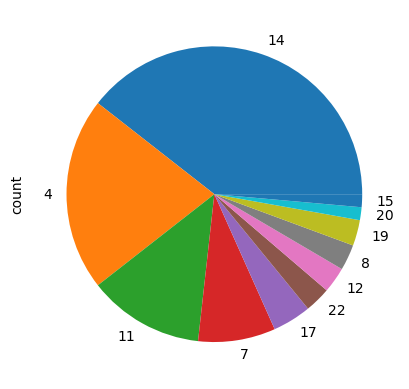

In [6]:
nan_counts_per_row = eeg_state.isna().sum(axis=1)

nan_counts_per_row.value_counts().plot(kind='pie')

mean_nan_perRows = int(nan_counts_per_row.mean()) 


In [7]:
eeg_state_cleaned = eeg_state[nan_counts_per_row <= mean_nan_perRows]

In [8]:
eeg_state_cleaned.sample(5)

,participant_id,Gender,Age,SessionOrder,EEG_SamplingTime_Open_NS,EEG_SamplingTime_Closed_NS,EEG_SamplingTime_Open_SD,EEG_SamplingTime_Closed_SD,PVT_SamplingTime_NS,PVT_SamplingTime_SD,...,y_po4,z_po4,x_po8,y_po8,z_po8,x_o2,y_o2,z_o2,manufacturer,sleep_status
28,sub-29,F,22,NS->SD,9:55:08,10:01:06,9:05:26,10:01:01,10:17:10,9:35:15,...,-31.4828,20.8468,-68.7209,-49.6689,-5.953,-80.784,-26.133,-4.0011,Brain Products GmbH,good sleep
15,sub-16,F,22,SD->NS,10:31:12,10:37:13,8:59:09,10:04:21,11:15:28,10:04:54,...,-31.4828,20.8468,-68.7209,-49.6689,-5.953,-80.784,-26.133,-4.0011,Brain Products GmbH,bad sleep
30,sub-31,M,21,NS->SD,9:46:36,9:58:31,8:50:02,9:38:11,10:16:22,8:37:52,...,-31.4828,20.8468,-68.7209,-49.6689,-5.953,-80.784,-26.133,-4.0011,Brain Products GmbH,good sleep
16,sub-17,F,18,SD->NS,10:23:36,10:29:36,9:54:28,10:48:05,11:11:26,9:25:55,...,-31.4828,20.8468,-68.7209,-49.6689,-5.953,-80.784,-26.133,-4.0011,Brain Products GmbH,bad sleep
5,sub-06,F,19,NS->SD,21:13:24,21:15:18,10:17:16,10:23:28,20:22:35,10:40:10,...,-31.4828,20.8468,-68.7209,-49.6689,-5.953,-80.784,-26.133,-4.0011,Brain Products GmbH,good sleep


In [9]:
eeg_state_cleaned = eeg_state_cleaned.drop(['participant_id','Age','Gender','SessionOrder','manufacturer'], axis=1)

In [10]:
import numpy as np
from sklearn.metrics import confusion_matrix

def custom_classification_report(y_true, y_pred, target_names, class_indices):
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Initialize lists to store precision, recall, F1-score, and support for each class
    precision = []
    recall = []
    f1_score = []
    support = []

    # Calculate precision, recall, F1-score for each class
    for i in range(len(target_names)):
        true_positives = cm[i, i]
        false_positives = cm[:, i].sum() - true_positives
        false_negatives = cm[i, :].sum() - true_positives
        true_negatives = cm.sum() - (true_positives + false_positives + false_negatives)

        # Precision: TP / (TP + FP)
        if true_positives + false_positives > 0:
            precision_i = true_positives / (true_positives + false_positives)
        else:
            precision_i = 0.0

        # Recall: TP / (TP + FN)
        if true_positives + false_negatives > 0:
            recall_i = true_positives / (true_positives + false_negatives)
        else:
            recall_i = 0.0

        # F1-Score: 2 * (Precision * Recall) / (Precision + Recall)
        if precision_i + recall_i > 0:
            f1_i = 2 * (precision_i * recall_i) / (precision_i + recall_i)
        else:
            f1_i = 0.0

        # Support: The number of true instances of each class
        support_i = cm[i, :].sum()

        # Append calculated metrics for this class
        precision.append(precision_i)
        recall.append(recall_i)
        f1_score.append(f1_i)
        support.append(support_i)

    # Calculate accuracy
    accuracy = np.trace(cm) / np.sum(cm)

    # Calculate average F1-score for specified classes
    f1_average = np.mean([f1_score[i] for i in class_indices])

    # Print the aesthetically improved report
    print("\n" + "Classification Report".center(65, "="))
    print(f"{'Class':<15}{'Precision':>12}{'Recall':>12}{'F1-Score':>12}{'Support':>12}")
    print("=" * 65)
    for i, label in enumerate(target_names):
        print(f"{label:<15}{precision[i]:>12.4f}{recall[i]:>12.4f}{f1_score[i]:>12.4f}{support[i]:>12}")
    print("=" * 65)
    print(f"Average F1-Score for classes : {f1_average:.4f}")
    print("=" * 65)

class_indices = [0, 1]

In [13]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler


le = LabelEncoder()
eeg_state_cleaned['sleep_status'] = le.fit_transform(eeg_state_cleaned['sleep_status'])

# Convert object columns to numeric
for col in eeg_state_cleaned.columns:
    if eeg_state_cleaned[col].dtype == 'object':
        eeg_state_cleaned[col] = pd.to_numeric(eeg_state_cleaned[col], errors='coerce')

# Features and target
X = eeg_state_cleaned.drop('sleep_status', axis=1)
y = eeg_state_cleaned['sleep_status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

params = {
    'objective': 'multi:softmax',
    'num_class': 2,  # Number of classes
    'learning_rate': 0.2087759602169422,
    'max_depth': 10,
    'subsample': 0.6478457734751482,
    'colsample_bytree': 0.9431214021788126,
    'device': 'cuda',  # Use GPU
    'random_state': 42,
}

train_data = xgb.DMatrix(X_train, label=y_train)
test_data = xgb.DMatrix(X_test, label=y_test)

xgb_model = xgb.train(params, train_data,num_boost_round=462)

# Predict the class labels
y_pred = xgb_model.predict(test_data)

In [14]:
print("Expected features:", xgb_model.feature_names)
print("Dataset columns:", eeg_state_cleaned.columns.tolist())

Expected features: ['EEG_SamplingTime_Open_NS', 'EEG_SamplingTime_Closed_NS', 'EEG_SamplingTime_Open_SD', 'EEG_SamplingTime_Closed_SD', 'PVT_SamplingTime_NS', 'PVT_SamplingTime_SD', 'PVT_item1_NS', 'PVT_item2_NS', 'PVT_item3_NS', 'PVT_item1_SD', 'PVT_item2_SD', 'PVT_item3_SD', 'PANAS_P_NS', 'PANAS_P_SD', 'PANAS_N_NS', 'PANAS_N_SD', 'ATQ_NS', 'ATQ_SD', 'SAI_NS', 'SAI_SD', 'SSS_NS', 'SSS_SD', 'KSS_NS', 'KSS_SD', 'SleepDiary_item1_NS', 'SleepDiary_item2_NS', 'SleepDiary_item3_NS', 'EQ', 'Buss_Perry', 'PSQI_GlobalScore', 'PSQI_item1', 'PSQI_item2', 'PSQI_item3', 'PSQI_item4', 'PSQI_item5', 'PSQI_item6', 'PSQI_item7', 'id', 'x_fp1', 'y_fp1', 'z_fp1', 'x_af3', 'y_af3', 'z_af3', 'x_af7', 'y_af7', 'z_af7', 'x_fz', 'y_fz', 'z_fz', 'x_f1', 'y_f1', 'z_f1', 'x_f3', 'y_f3', 'z_f3', 'x_f5', 'y_f5', 'z_f5', 'x_f7', 'y_f7', 'z_f7', 'x_fc1', 'y_fc1', 'z_fc1', 'x_fc3', 'y_fc3', 'z_fc3', 'x_fc5', 'y_fc5', 'z_fc5', 'x_ft7', 'y_ft7', 'z_ft7', 'x_cz', 'y_cz', 'z_cz', 'x_c1', 'y_c1', 'z_c1', 'x_c3', 'y_c3', 

In [15]:

target_names=list(map(str,le.classes_))

In [16]:
# Generate and print classification report
report = custom_classification_report(y_test, y_pred, target_names=target_names,class_indices = [0, 1])
print(report)



======================Classification Report======================
Class             Precision      Recall    F1-Score     Support
0                    0.8000      1.0000      0.8889           4
1                    1.0000      0.6667      0.8000           3
Average F1-Score for classes : 0.8444
None


In [18]:
from sklearn.metrics import accuracy_score

# Predict the class labels
y_pred = xgb_model.predict(test_data)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 85.71%


# CNN

In [23]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import f1_score, accuracy_score

import torch.nn as nn
import torch.optim as optim

# Define the CNN model
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(32 * 55, 128)  # Adjust the input size based on the output of conv2
        self.fc2 = nn.Linear(128, 2)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool1d(kernel_size=2)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.maxpool(x)
        x = self.relu(self.conv2(x))
        x = self.maxpool(x)
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Prepare the data
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32).unsqueeze(1)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Initialize the model, loss function, and optimizer
model = CNNModel()

# Calculate the correct input size for fc1
with torch.no_grad():
    dummy_input = torch.zeros(1, 1, X_train.shape[1])
    dummy_output = model.conv1(dummy_input)
    dummy_output = model.maxpool(dummy_output)
    dummy_output = model.conv2(dummy_output)
    dummy_output = model.maxpool(dummy_output)
    fc1_input_size = dummy_output.view(dummy_output.size(0), -1).size(1)

model.fc1 = nn.Linear(fc1_input_size, 128)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(y_batch.numpy())
        y_pred.extend(predicted.numpy())

# Calculate F1 score and accuracy
f1 = f1_score(y_true, y_pred, average='weighted')
accuracy = accuracy_score(y_true, y_pred)

print(f'F1 Score: {f1:.4f}')
print(f'Accuracy: {accuracy * 100:.2f}%')

Epoch [1/20], Loss: nan
Epoch [2/20], Loss: nan
Epoch [3/20], Loss: nan
Epoch [4/20], Loss: nan
Epoch [5/20], Loss: nan
Epoch [6/20], Loss: nan
Epoch [7/20], Loss: nan
Epoch [8/20], Loss: nan
Epoch [9/20], Loss: nan
Epoch [10/20], Loss: nan
Epoch [11/20], Loss: nan
Epoch [12/20], Loss: nan
Epoch [13/20], Loss: nan
Epoch [14/20], Loss: nan
Epoch [15/20], Loss: nan
Epoch [16/20], Loss: nan
Epoch [17/20], Loss: nan
Epoch [18/20], Loss: nan
Epoch [19/20], Loss: nan
Epoch [20/20], Loss: nan
F1 Score: 0.4156
Accuracy: 57.14%


# LSTM

In [25]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import f1_score, accuracy_score

import torch.nn as nn
import torch.optim as optim

# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        out, _ = self.lstm(x.unsqueeze(1), (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# Prepare the data
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Initialize the model, loss function, and optimizer
input_size = X_train.shape[1]
hidden_size = 128
num_layers = 2
num_classes = 2

model = LSTMModel(input_size, hidden_size, num_layers, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(y_batch.numpy())
        y_pred.extend(predicted.numpy())

# Calculate F1 score and accuracy
f1 = f1_score(y_true, y_pred, average='weighted')
accuracy = accuracy_score(y_true, y_pred)

print(f'F1 Score: {f1:.4f}')
print(f'Accuracy: {accuracy * 100:.2f}%')

Epoch [1/20], Loss: nan
Epoch [2/20], Loss: nan
Epoch [3/20], Loss: nan
Epoch [4/20], Loss: nan
Epoch [5/20], Loss: nan
Epoch [6/20], Loss: nan
Epoch [7/20], Loss: nan
Epoch [8/20], Loss: nan
Epoch [9/20], Loss: nan
Epoch [10/20], Loss: nan
Epoch [11/20], Loss: nan
Epoch [12/20], Loss: nan
Epoch [13/20], Loss: nan
Epoch [14/20], Loss: nan
Epoch [15/20], Loss: nan
Epoch [16/20], Loss: nan
Epoch [17/20], Loss: nan
Epoch [18/20], Loss: nan
Epoch [19/20], Loss: nan
Epoch [20/20], Loss: nan
F1 Score: 0.4156
Accuracy: 57.14%


# CNN+LSTM

In [35]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import f1_score, accuracy_score

import torch.nn as nn
import torch.optim as optim

# Define the CNN+LSTM model
class CNNLSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(CNNLSTMModel, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.lstm = nn.LSTM(32, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool1d(kernel_size=2)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.maxpool(x)
        x = self.relu(self.conv2(x))
        x = self.maxpool(x)
        x = x.permute(0, 2, 1)
        x, _ = self.lstm(x)
        x = self.fc(x[:, -1, :])
        return x

# Prepare the data
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32).unsqueeze(1)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Initialize the model, loss function, and optimizer
input_size = X_train.shape[1]
hidden_size = 128
num_layers = 2
num_classes = 2

model = CNNLSTMModel(input_size, hidden_size, num_layers, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(y_batch.numpy())
        y_pred.extend(predicted.numpy())

# Calculate F1 score and accuracy
f1 = f1_score(y_true, y_pred, average='weighted')
accuracy = accuracy_score(y_true, y_pred)

print(f'F1 Score: {f1:.4f}')
print(f'Accuracy: {accuracy * 100:.2f}%')

Epoch [1/20], Loss: nan
Epoch [2/20], Loss: nan
Epoch [3/20], Loss: nan
Epoch [4/20], Loss: nan
Epoch [5/20], Loss: nan
Epoch [6/20], Loss: nan
Epoch [7/20], Loss: nan
Epoch [8/20], Loss: nan
Epoch [9/20], Loss: nan
Epoch [10/20], Loss: nan
Epoch [11/20], Loss: nan
Epoch [12/20], Loss: nan
Epoch [13/20], Loss: nan
Epoch [14/20], Loss: nan
Epoch [15/20], Loss: nan
Epoch [16/20], Loss: nan
Epoch [17/20], Loss: nan
Epoch [18/20], Loss: nan
Epoch [19/20], Loss: nan
Epoch [20/20], Loss: nan
F1 Score: 0.4156
Accuracy: 57.14%


Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-01\ses-2\eeg\sub-01_ses-2_task-eyesclosed_eeg.fdt


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


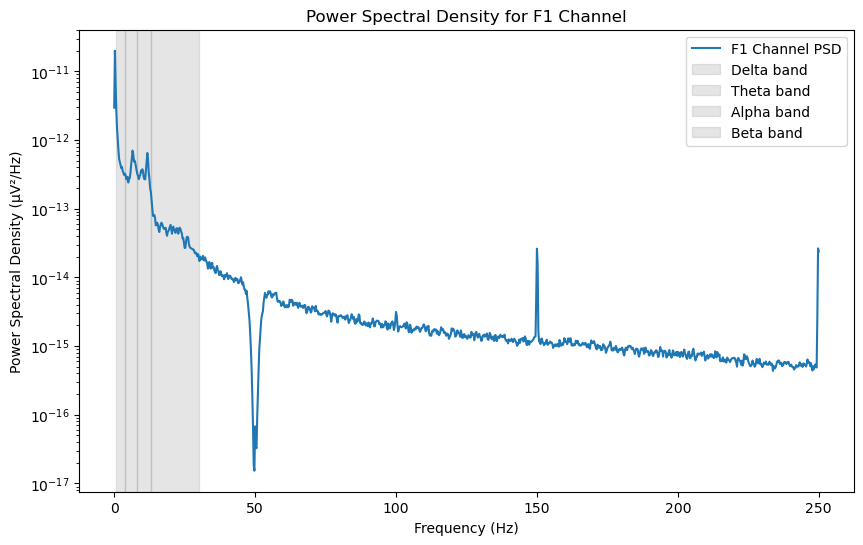

Band Power for F1 Channel:
Delta: 0.00 µV²
Theta: 0.00 µV²
Alpha: 0.00 µV²
Beta: 0.00 µV²


In [21]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch
import mne

# Load the .set file
file_path = r'D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-01\ses-2\eeg\sub-01_ses-2_task-eyesclosed_eeg.set'
raw = mne.io.read_raw_eeglab(file_path)

bands = {
    'Delta': (0.5, 4),
    'Theta': (4, 8),
    'Alpha': (8, 13),
    'Beta': (13, 30),
}

raw.pick_channels(['F1'])
sfreq = raw.info['sfreq']  # Sampling frequency
data = raw.get_data()[0]   # Extract the F1 channel signal

frequencies, psd = welch(data, fs=sfreq, nperseg=4 * sfreq)

band_power = {}
for band, (low, high) in bands.items():
    band_mask = (frequencies >= low) & (frequencies <= high)
    band_power[band] = np.sum(psd[band_mask])

plt.figure(figsize=(10, 6))
plt.semilogy(frequencies, psd, label='F1 Channel PSD')
for band, (low, high) in bands.items():
    plt.axvspan(low, high, color='gray', alpha=0.2, label=f'{band} band')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (µV²/Hz)')
plt.title('Power Spectral Density for F1 Channel')
plt.legend(loc='upper right')
plt.show()

# Print band power
print("Band Power for F1 Channel:")
for band, power in band_power.items():
    print(f"{band}: {power:.2f} µV²")


Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-01\ses-2\eeg\sub-01_ses-2_task-eyesclosed_eeg.fdt
Reading 0 ... 149999  =      0.000 ...   299.998 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


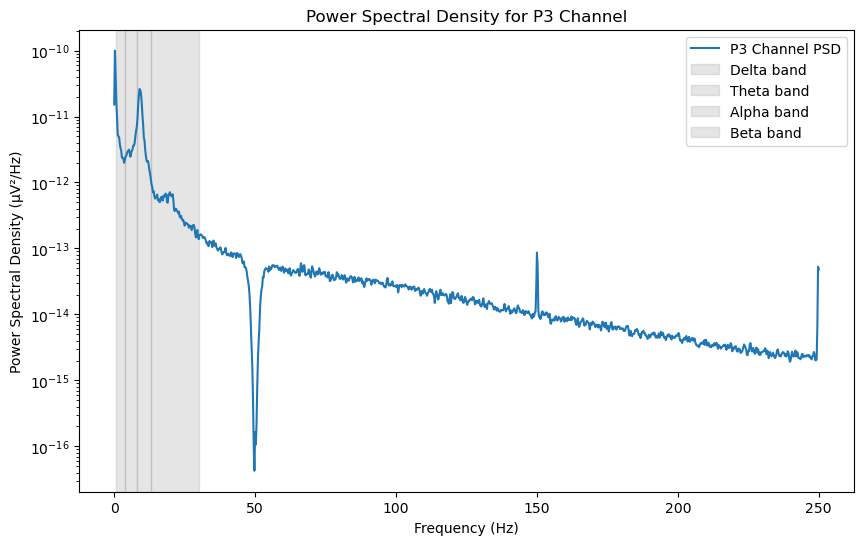

Band Power for P3 Channel:
Delta: 1.0499808247346831e-10 µV²
Theta: 6.025136483661093e-11 µV²
Alpha: 1.8716429132120752e-10 µV²
Beta: 3.034944207249326e-11 µV²


In [19]:
import numpy as np
import mne
import matplotlib.pyplot as plt
from scipy.signal import welch
from mne.datasets import sample
from mne.io import read_raw_fif

# Load sample EEG data (P3 channel extraction example)
data_path = r'D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-01\ses-2\eeg\sub-01_ses-2_task-eyesclosed_eeg.set'
raw = mne.io.read_raw_eeglab(data_path , preload=True)

# Pick the P3 channel
raw.pick_channels(['P3'])
sfreq = raw.info['sfreq']  # Sampling frequency
data = raw.get_data()[0]   # Extract the P3 channel signal

# Define frequency bands (Hz)
bands = {
    'Delta': (0.5, 4),
    'Theta': (4, 8),
    'Alpha': (8, 13),
    'Beta': (13, 30),
}

# Compute PSD using Welch's method
frequencies, psd = welch(data, fs=sfreq, nperseg=4 * sfreq)


# Calculate band power
band_power = {}
for band, (low, high) in bands.items():
    band_mask = (frequencies >= low) & (frequencies <= high)
    band_power[band] = np.sum(psd[band_mask])

# Plot the PSD

plt.figure(figsize=(10, 6))

plt.semilogy(frequencies, psd, label='P3 Channel PSD')

for band, (low, high) in bands.items():
    plt.axvspan(low, high, color='gray', alpha=0.2, label=f'{band} band')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (µV²/Hz)')
plt.title('Power Spectral Density for P3 Channel')
plt.legend(loc='upper right')
plt.show()


# Print band power
print("Band Power for P3 Channel:")

for band, power in band_power.items():
    print(f"{band}: {power} µV²")
    
